# Finding a particle's best path to a goal using gradient descent

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# from vpython import*
# scene = canvas()
# sphere()

78
93


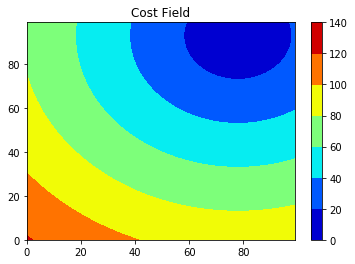

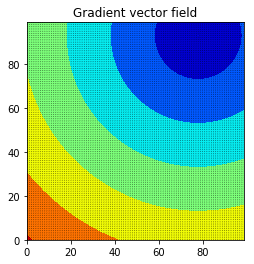

Initial Cost: 51.312766
Epoch 0, cost: 51.212766
Epoch 1, cost: 51.112766
Epoch 2, cost: 51.012766
Epoch 3, cost: 50.912766
Epoch 4, cost: 50.812766
Epoch 5, cost: 50.712766
Epoch 6, cost: 50.612766
Epoch 7, cost: 50.512766
Epoch 8, cost: 50.412766
Epoch 9, cost: 50.312766
Epoch 10, cost: 50.212766
Epoch 11, cost: 50.112766
Epoch 12, cost: 50.012766
Epoch 13, cost: 49.912766
Epoch 14, cost: 49.812766
Epoch 15, cost: 49.712766
Epoch 16, cost: 49.612766
Epoch 17, cost: 49.512766
Epoch 18, cost: 49.412766
Epoch 19, cost: 49.312766
Epoch 20, cost: 49.212766
Epoch 21, cost: 49.112766
Epoch 22, cost: 49.012766
Epoch 23, cost: 48.912766
Epoch 24, cost: 48.812766
Epoch 25, cost: 48.712766
Epoch 26, cost: 48.612766
Epoch 27, cost: 48.512766
Epoch 28, cost: 48.412766
Epoch 29, cost: 48.312766
Epoch 30, cost: 48.212766
Epoch 31, cost: 48.112766
Epoch 32, cost: 48.012766
Epoch 33, cost: 47.912766
Epoch 34, cost: 47.812766
Epoch 35, cost: 47.712766
Epoch 36, cost: 47.612766
Epoch 37, cost: 47.51276

(77.99303369473944, 92.9893017454927)

In [10]:
Grid = np.mgrid[0:100, 0:100]
X = Grid[0]
Y = Grid[1]
# Arb goal at 78, 93
print(X[78][0])
print(Y[0][93])
x_g = X[78][0]
y_g = Y[0][93]

C = computeCost(X, Y, x_g, y_g)
# print(computeCostField(0, 0, x_g, y_g))
# print(dx.shape)
# print(dy.shape)
# print(C[60][94])

plt.contourf(X, Y, C, cmap = 'jet')
plt.colorbar()
plt.title('Cost Field')
plt.show()


dx, dy = computeGradient(X,Y,x_g,y_g)
dx = -dx
dy = -dy
fig, ax = plt.subplots()
ax.contourf(X, Y, C, cmap = 'jet')
# fig.colorbar()
ax.quiver(X,Y,dx,dy)
ax.set(aspect=1, title='Gradient vector field')

# ax.xaxis.set_ticks([])
# ax.yaxis.set_ticks([])
# ax.set_aspect('equal')

plt.show()

gradDescent(50, 50, x_g, y_g)
# print(G[0,3,0])
# print(X)
# print(Y)

(3, 2)


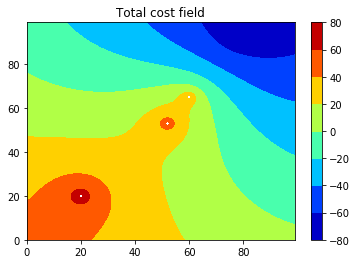

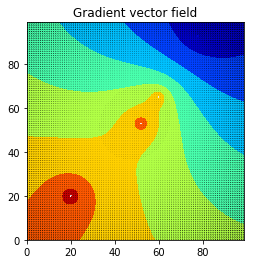

In [65]:
obs = np.array([52,53,60,65,20,20])
obs = np.reshape(obs, (3,2))
print(obs.shape)
C_obs = costWithObstables(X,Y,x_g,y_g,obs,10)
# print(C_obs.shape)
C_total = C+(15*C_obs)
plt.contourf(X, Y, C_total, cmap = 'jet')
plt.colorbar()
plt.title('Total cost field')
plt.show()

dx, dy = gradWithObst(X,Y,x_g,y_g,obs,10)
dx = -dx
dy = -dy
fig, ax = plt.subplots()
ax.contourf(X, Y, C_total, cmap = 'jet')
# fig.colorbar()
ax.quiver(X,Y,dx,dy)
ax.set(aspect=1, title='Gradient vector field')

plt.show()

In [11]:
def computeCost(X,Y, x_g, y_g):
   return np.sqrt(np.square(X-x_g) + np.square(Y-y_g))



In [64]:
def costWithObstables(X,Y, x_g, y_g, Obs, R):
    obsField = np.zeros([100,100])
    for i in range(0,Obs.shape[0]):
        x_o = Obs[i][0]
        y_o = Obs[i][1]
        # d = np.sqrt(np.square(X-Obs[i][0]) + np.square(Y-Obs[i][1]))
        d = euclDist(X,Y, x_o,y_o)
        # obsField += np.log(R/d)
        # euclDst = np.sqrt(np.square(X-Obs[i][0]) + np.square(Y-Obs[i][1])) #Eucledian distance
        obsField = obsField if d.all() > R else obsField+np.log(R/d)
    return obsField

In [12]:
def computeGradient(X, Y, x_g, y_g):
    C = computeCost(X, Y, x_g, y_g)
    dx = (X-x_g)/C
    dy = (Y-y_g)/C
    return dx, dy

In [49]:
def gradWithObst(X, Y, x_g, y_g, Obs, R):
    # C = computeCost(X, Y, x_g, y_g, Obs, R)
    # dx = (X-x_g)/C
    # dy = (Y-y_g)/C
    dx = np.zeros([100,100])
    dy = np.zeros([100,100])
    for i in range(0, Obs.shape[0]):
        x_o = Obs[i][0]
        y_o = Obs[i][1]
        dx += ((X-x_g)/euclDist(X,Y,x_g,y_g)) + ((X-x_o)/R)
        dy += ((Y-y_g)/euclDist(X,Y,x_g,y_g)) + ((Y-y_o)/R)
    # dx = ()
    return dx, dy

In [35]:
def euclDist(x1,y1,x2,y2):
    return np.sqrt(np.square(x2-x1) + np.square(y2-y1))


In [13]:
def gradDescent(x,y,x_g,y_g):
    C = computeCost(x,y,x_g,y_g)
    print("Initial Cost: %f" % C)
    lmbda = 0.1
    i = 0
    while C > 0.02:
        dx, dy = computeGradient(x,y,x_g,y_g) 
        x = x - lmbda*dx
        y = y - lmbda*dy
        C = computeCost(x,y,x_g,y_g)
        print("Epoch %d, cost: %f" % (i,C))
        i+= 1
    print("Done!")
    print("Minimum at: %d, %d" % (x,y))
    return x, y


